# Mulitple Linear Regression
## Problem Statement:  
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

## Solution:   
**Below are the various steps followed for building the model.** 
1. Reading, Understanding & visualizing the data
2. Data Preprocessing   
3. RFE   
4. Residual analysis   
5. Model Evaluation


In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

## 1. Reading, Understanding & visualizing the data


In [2]:
# load the dataset
bikes_data=pd.read_csv('day.csv')
bikes_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Check the shape
print("Rows    : ", bikes_data.shape[0])
print("Columns : ", bikes_data.shape[1])

Rows    :  730
Columns :  16


In [4]:
# understand the data
bikes_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
print("Columns")
print("-"*50)
for col in bikes_data.columns:
    print(col)

Columns
--------------------------------------------------
instant
dteday
season
yr
mnth
holiday
weekday
workingday
weathersit
temp
atemp
hum
windspeed
casual
registered
cnt


**drop** 
* instant
* dteday
* casual
* registered

**categorical**   
* year (binary)
* holiday (binary)
* workingday (binary)
* season
* month
* weekday
* weathersit

**Continuos**  
* temp
* atemp
* hum
* windspeed

**Target**    
* cnt

In [7]:
# Check for missing values
bikes_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# check for duplicates
bikes_data.duplicated().any()

False

In [9]:
bikes_data['cnt_']=bikes_data['casual']+bikes_data['registered']
bikes_data['cnt_'].equals(bikes_data['cnt'])

True

* <font color='green'>**No missing values in any column**</font>
* <font color='green'>**No duplicates**</font>
* <font color='green'>**'casual'+'registered'='cnt'. Hence dropping both**</font>
* <font color='green'>**'instant' is just an index. so, dropping it**</font>
* <font color='green'>**'dteday' information exists in 'yr', 'mnth', 'weekday'. so, dropping it**</font>

In [10]:
# drop columns which are not useful for analysis and model building
bikes_data=bikes_data.drop(['instant','dteday','casual','registered','cnt_'],axis=1)
bikes_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# renaming column names
bikes_data.rename(columns={'yr':'year',
                           'mnth':'month',
                           'hum':'humidity'}, inplace=True)

In [12]:
# mapping the column values
bikes_data.season = bikes_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bikes_data.month = bikes_data.month.map({1:'jan',2:'feb',3:'mar',
                                         4:'apr',5:'may',6:'june',
                                         7:'july',8:'aug',9:'sep',
                                         10:'oct',11:'nov',12:'dec'})
bikes_data.weekday = bikes_data.weekday.map({0:'sun',1:'mon',
                                             2:'tue',3:'wed',
                                             4:'thu',5:'fri',6:'sat'})

bikes_data.weathersit = bikes_data.weathersit.map({1:'Clear',2:'Misty',
                                                   3:'Light_Snow_Rain',
                                                   4:'Heavy_Snow_Rain'})


In [13]:
bikes_data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


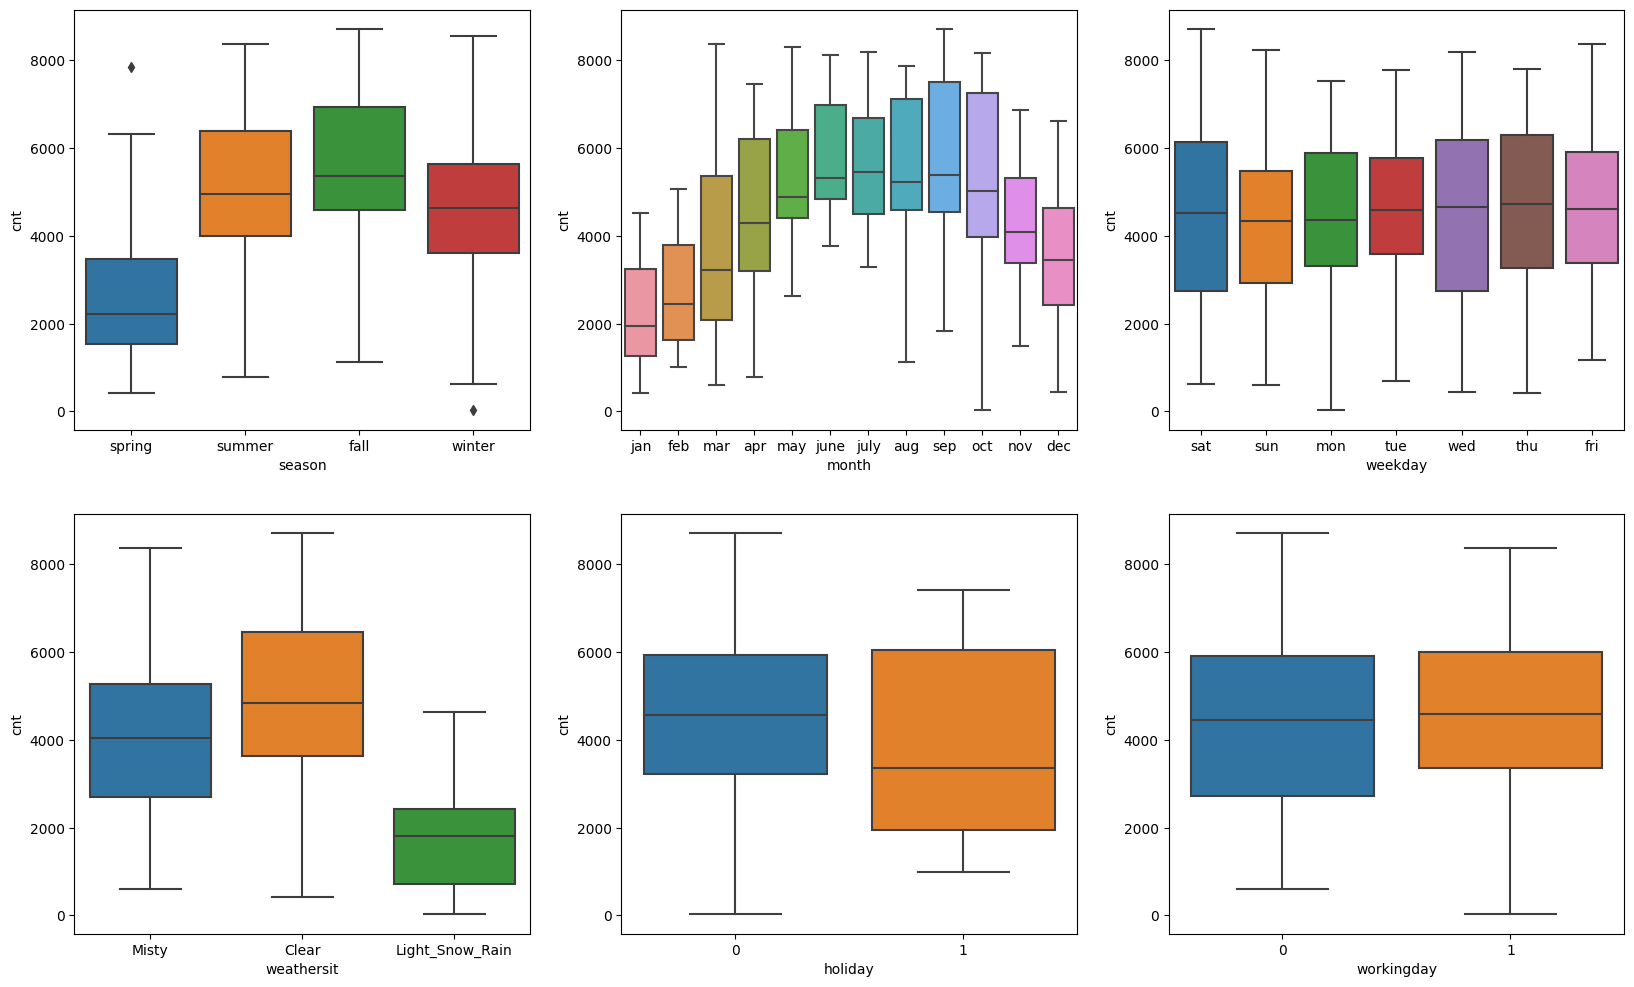

In [14]:
# Visualization
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikes_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'month', y = 'cnt', data = bikes_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikes_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikes_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikes_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikes_data)
plt.show()

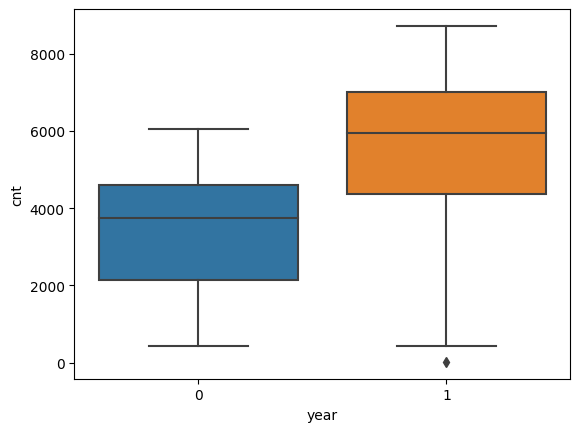

In [15]:
sns.boxplot(x = 'year', y = 'cnt', data = bikes_data)
plt.show()

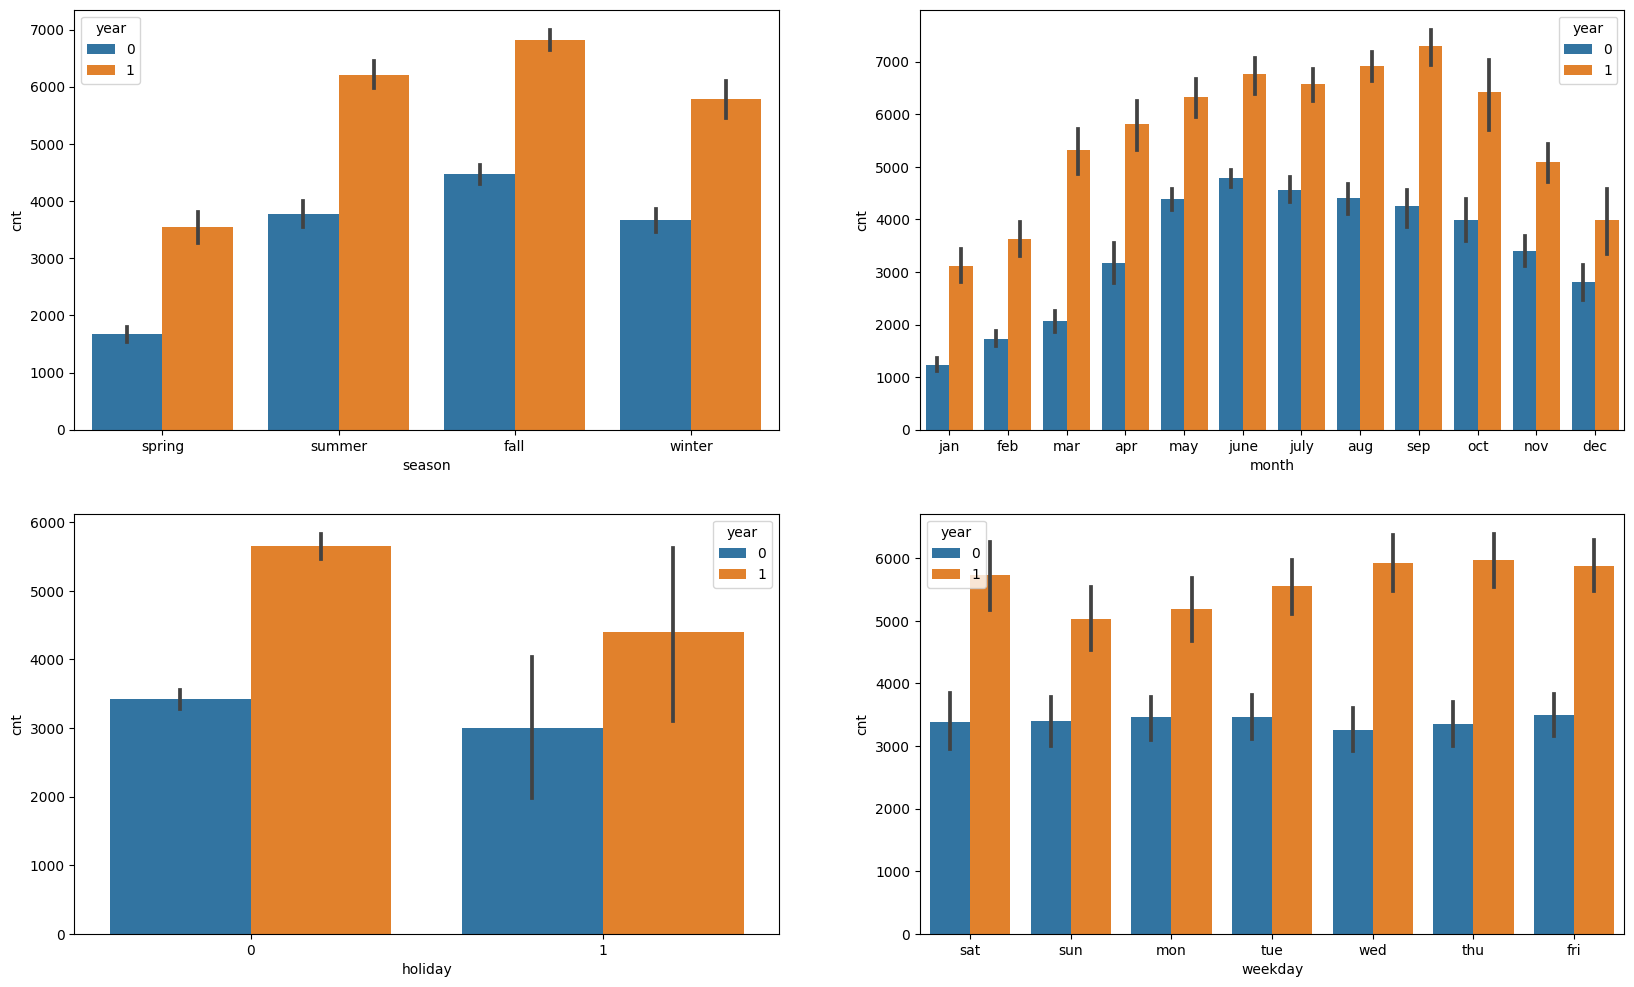

In [16]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.barplot(x='season',y='cnt',hue='year',data=bikes_data)

plt.subplot(2,2,2)
sns.barplot(x='month',y='cnt',hue='year',data=bikes_data)

plt.subplot(2,2,3)
sns.barplot(x='holiday',y='cnt',hue='year',data=bikes_data)

plt.subplot(2,2,4)
sns.barplot(x='weekday',y='cnt',hue='year',data=bikes_data)

plt.show()

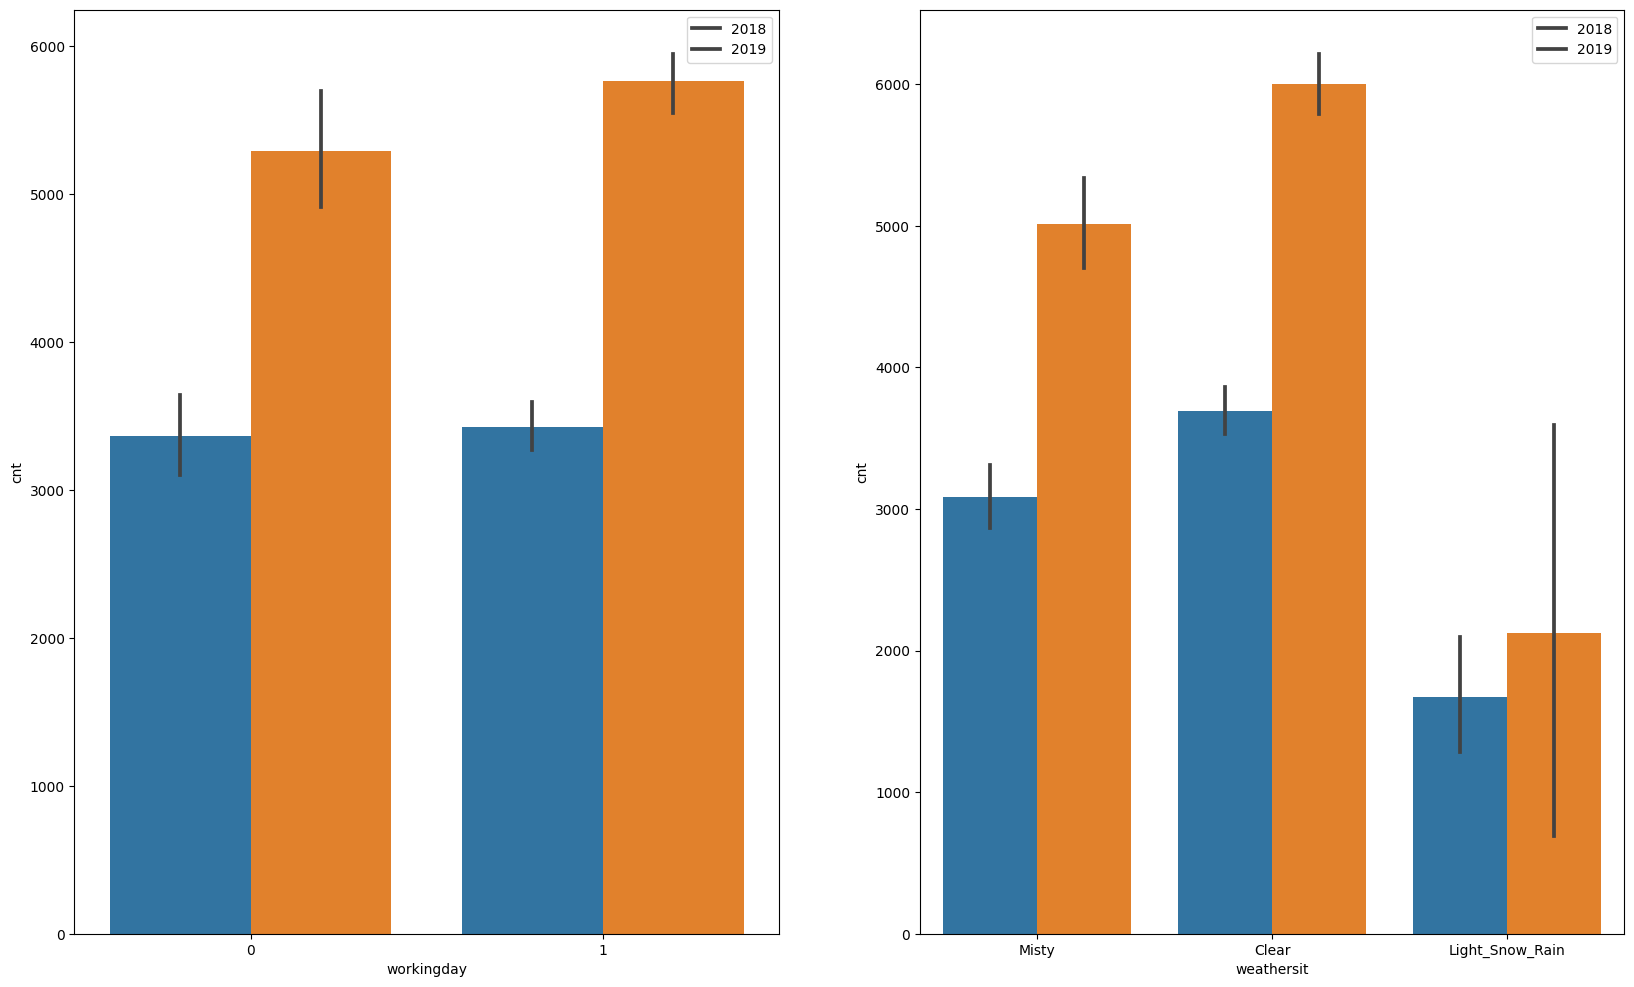

In [17]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.barplot(x='workingday',y='cnt',hue='year',data=bikes_data)
plt.legend(labels=['2018','2019'])
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',hue='year',data=bikes_data)
plt.legend(labels=['2018','2019'])

plt.show()

## Observation from plots of categorical variables
* <font color='green'>**The count of rental bike is more during fall season of both 2018 & 2019**</font>
* <font color='green'>**The demand for rental bikes gradually increases and then decreases during 2018 and 2019**</font>
* <font color='green'>**The demand of rental bikes is more during non hoiday sesaon for both 2018 and 2019 years**</font>
* <font color='green'>**The demand for rental bikes is more during weekdays when comapred to weekends**</font>
* <font color='green'>**The demand is high when the weather is Clear**</font>

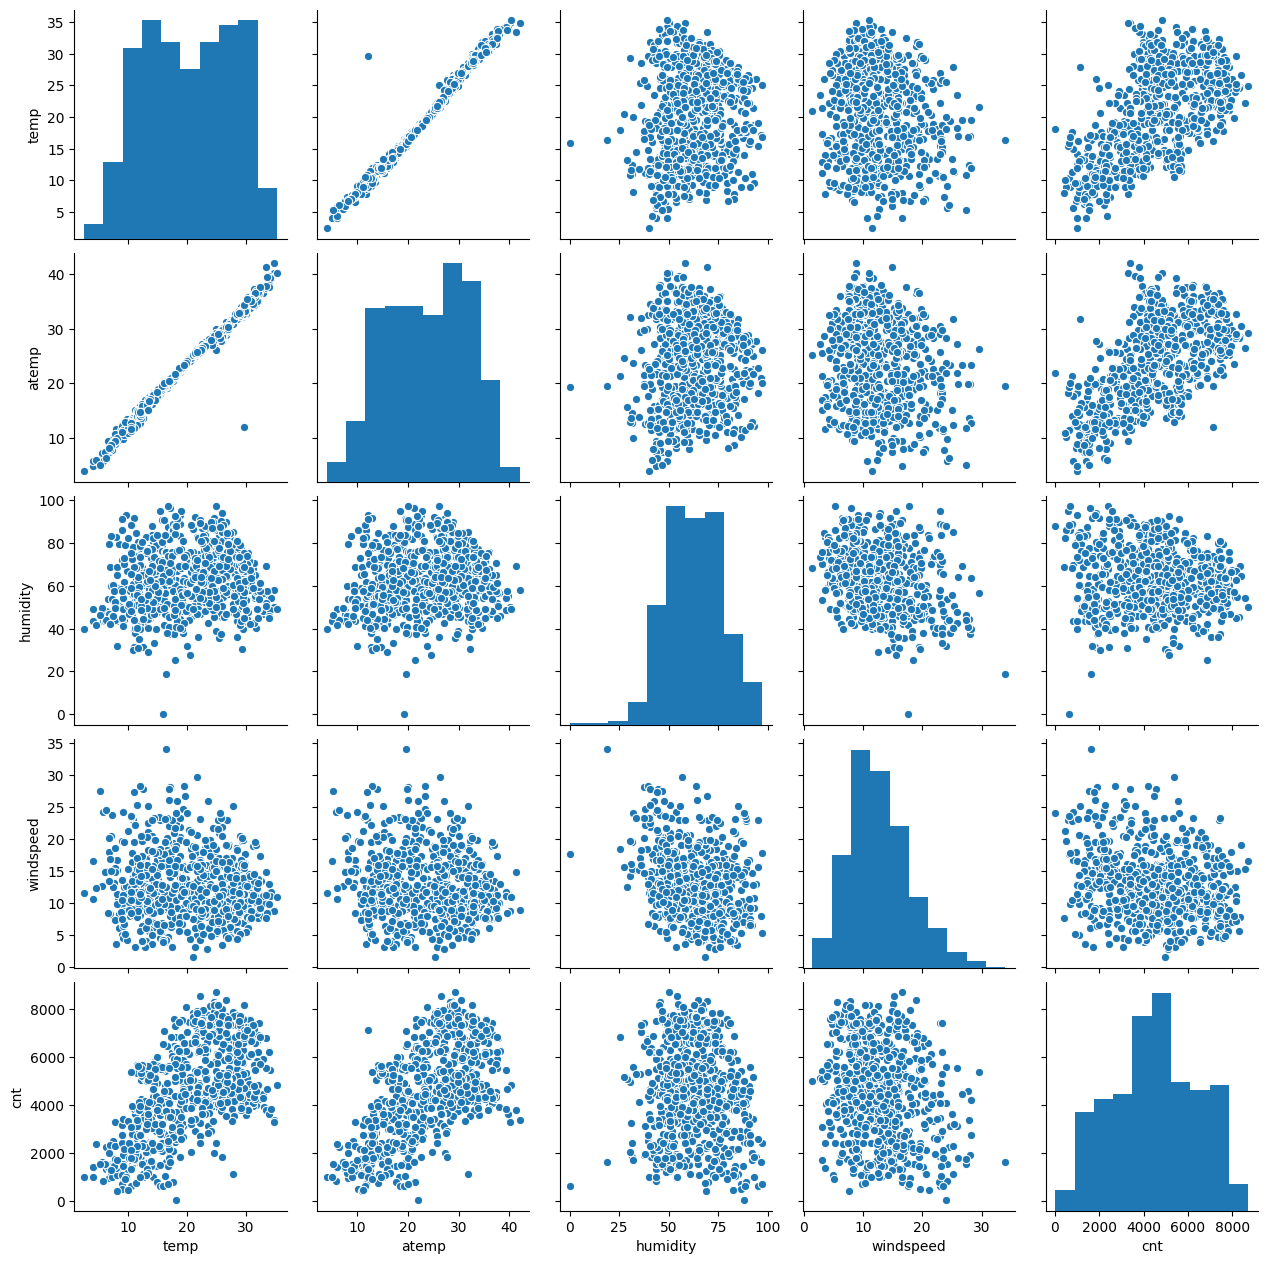

In [18]:
# visualizing continuous variables
sns.pairplot(data=bikes_data, vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

## Observation from plots of continuos variables
* <font color='green'>**There is clear linear relationship between 'temp' and 'atemp' features**</font>
* <font color='green'>**There is linear relationship between 'temp'&'cnt', 'atemp'&'cnt' features**</font>

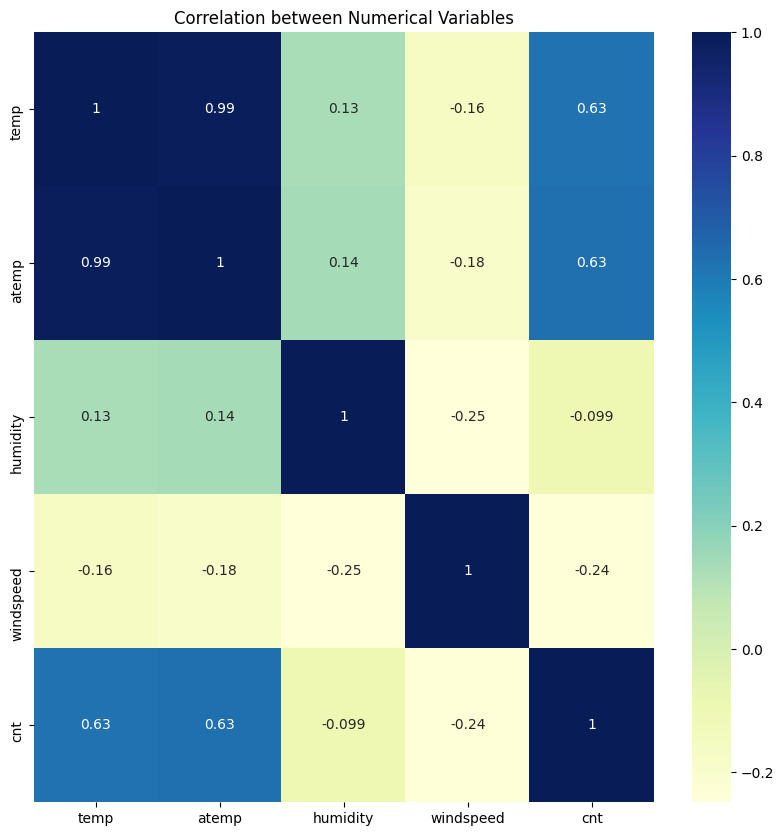

In [19]:
# check for correlation among the variables
plt.figure(figsize = (10,10))

sns.heatmap(bikes_data[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True,cmap="YlGnBu")
plt.title("Correlation between Numerical Variables")
plt.show()

* <font color='green'>**Heat map also shows a clear linear relationship between 'temp' and 'atemp' features. This can cause multicolinearity**</font>

## 2. Data Preprocessing   
    - Converting binary features to 0s and 1s   
    - dummy variable encoding for categorical vairables

In [20]:
# creating dummy variables
dummy_list=[]
for column in ['season', 'month', 'weekday', 'weathersit']:
    dummied=pd.get_dummies(bikes_data[column],drop_first=True)
    dummy_list.append(dummied)
    
# concatenating all the dummy variables to the final data frame 
bikes=pd.concat(dummy_list, axis=1)
for col in ['year','holiday','workingday']:
    bikes[col]=bikes_data[col]
# adding back the continuos variables
for col in ['temp','atemp','humidity','windspeed','cnt']:
    bikes[col]=bikes_data[col]
bikes.head()

,spring,summer,winter,aug,dec,feb,jan,july,june,mar,...,Light_Snow_Rain,Misty,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
# train test split
df_train,df_test=train_test_split(bikes,train_size=0.7, random_state=100)
print(f"Train shape: {df_train.shape}")
print(f"Test shape : {df_test.shape}")

Train shape: (510, 30)
Test shape : (220, 30)


In [22]:
# scaling the numeric features
scaler=MinMaxScaler()
numeric_variables=['temp','atemp','humidity','windspeed','cnt']
scaler.fit(df_train[numeric_variables])
df_train[numeric_variables]=scaler.transform(df_train[numeric_variables])
df_test[numeric_variables]=scaler.transform(df_test[numeric_variables])
# check
df_train[numeric_variables].describe()

,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


* <font color='green'>**Max values of all the numeric variables is 1. Hence the minmax scaling worked as expected**</font>

## 3. RFE

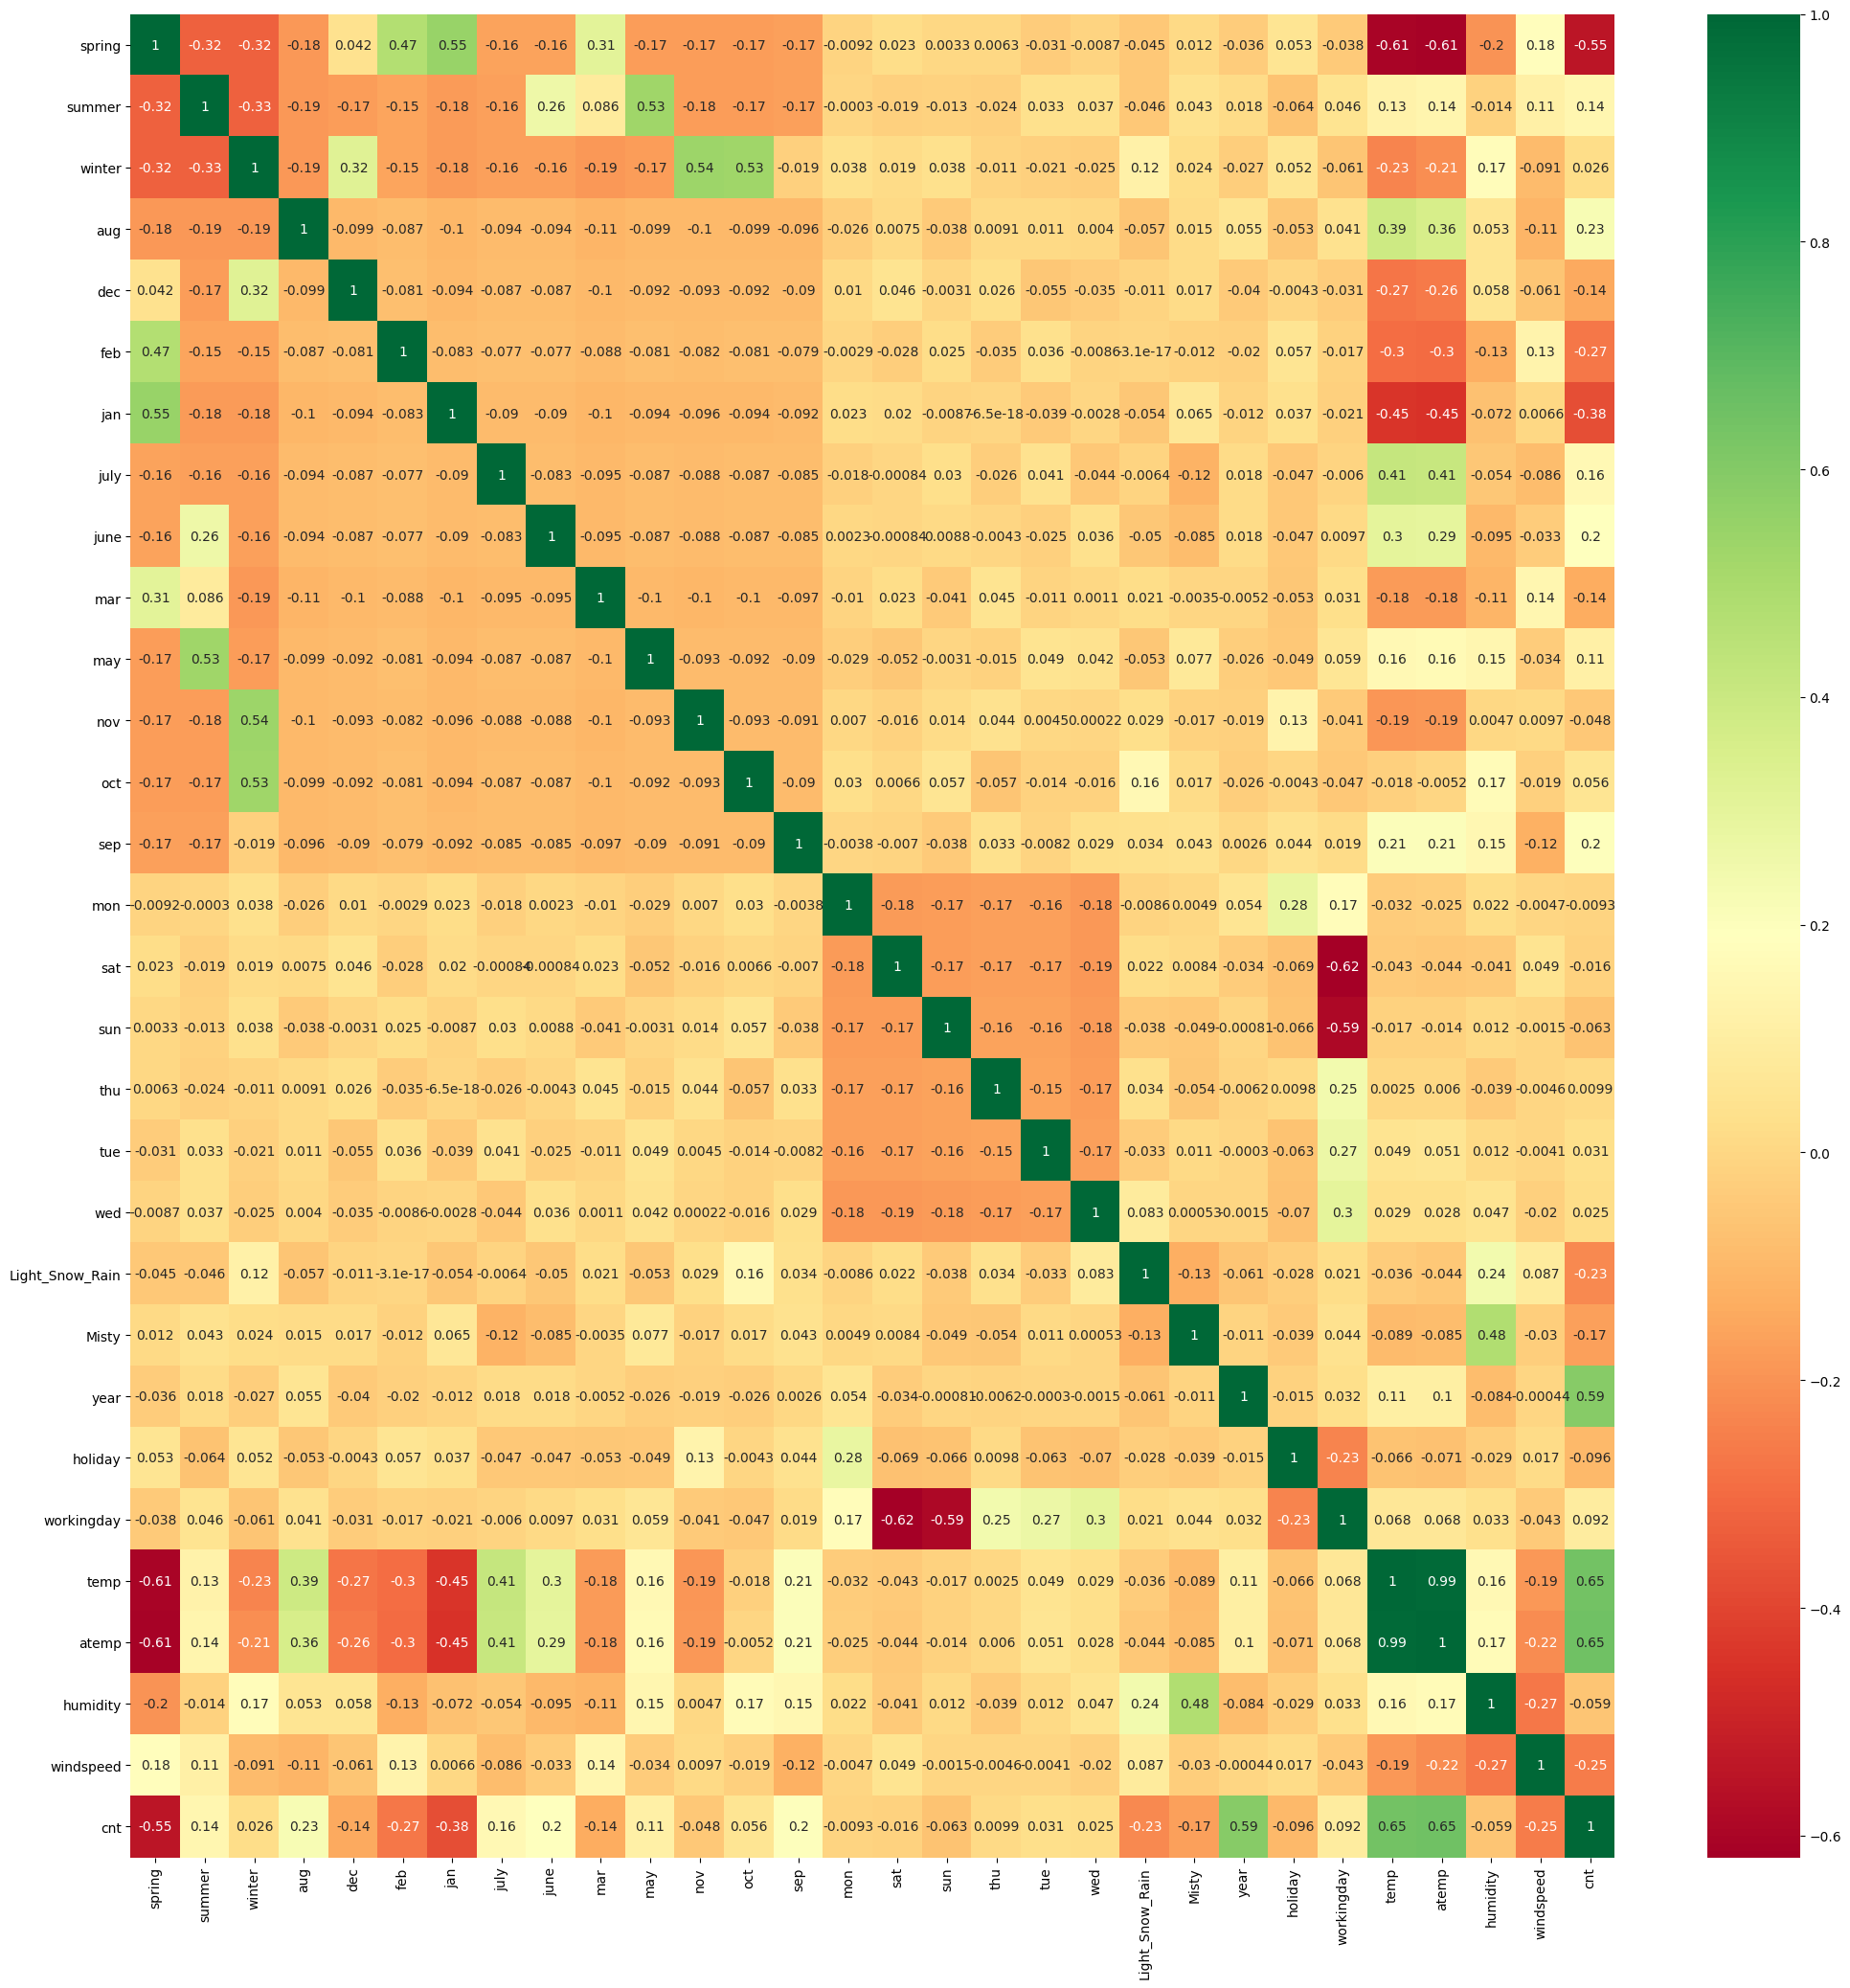

In [23]:
# check correlations
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

* <font color='green'>**'cnt' has a good correlation with 'year','temp','atemp'**</font>
* <font color='green'>**'temp' and 'atemp' have a very high correlation**</font>

In [24]:
X_train=df_train.iloc[:,:-1]
y_train=df_train['cnt']

X_test=df_test.iloc[:,:-1]
y_test=df_test['cnt']

In [25]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)       
rfe = rfe.fit(X_train, y_train)

# list of top 15
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 6),
 ('dec', False, 3),
 ('feb', False, 15),
 ('jan', False, 2),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 11),
 ('may', False, 7),
 ('nov', False, 4),
 ('oct', False, 8),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 10),
 ('wed', False, 14),
 ('Light_Snow_Rain', True, 1),
 ('Misty', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [26]:
columns_rfe = X_train.columns[rfe.support_]
print("Columns supported by RFE: ")
print("-"*20)
for col in columns_rfe:
    print(col)

Columns supported by RFE: 
--------------------
spring
summer
winter
july
sep
sat
sun
Light_Snow_Rain
Misty
year
holiday
workingday
temp
humidity
windspeed


In [27]:
def compute_vif(X):
    """Method take a dataframe and computed the VIF for its features"""
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

def build_model(X_):
    """Method takes a dataframe and prints the fitted model summary"""
    # Adding a constant variable 
    X_train_lm = sm.add_constant(X_)
    lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
    print(lm.summary())
    return


**Model 1** :  Dropping the variable and updating the model

In [28]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe=X_train[columns_rfe]
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.11e-191
Time:                        17:49:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1995      0.028     

* <font color='green'>**'holiday' has a p-value 0.386>0.05. This is insignificant for the model.Hence dropping it.**</font>

In [29]:
# Rebuilding the model without 'holiday'
X_train_rfe = X_train_rfe.drop(["holiday"], axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.11e-191
Time:                        17:49:44   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1811      0.042     

* <font color='green'>**All features have p-value < 0.05**</font>

In [30]:
# Calculate the VIFs for the new model
vif=compute_vif(X_train_rfe)
vif

,Features,VIF
12,humidity,32.10
11,temp,18.99
10,workingday,18.41
5,sat,4.91
13,windspeed,4.91
0,spring,4.80
6,sun,4.76
2,winter,3.69
1,summer,3.04
8,Misty,2.31


* <font color='green'>**'humidity' has very high vif value.Hence dropping it.**</font>

**Model 2** :  Dropping the variable and updating the model

In [31]:
# Rebuilding the model without 'humidity'
X_train_rfe = X_train_rfe.drop(["humidity"], axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          1.28e-188
Time:                        17:49:44   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1008      0.038     

* <font color='green'>**All features have p-value < 0.05**</font>

In [32]:
# Calculate the VIFs for the new model
vif=compute_vif(X_train_rfe)
vif

,Features,VIF
10,workingday,16.19
11,temp,12.74
12,windspeed,4.76
5,sat,4.45
6,sun,4.21
0,spring,3.82
2,winter,2.78
1,summer,2.76
9,year,2.07
3,july,1.60


* <font color='green'>**'workingday' has very high vif value.Hence dropping it.**</font>

**Model 3** : Dropping the variable and updating the model

In [33]:
# Rebuilding the model without 'workingday'
X_train_rfe = X_train_rfe.drop(["workingday"], axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          2.06e-186
Time:                        17:49:44   Log-Likelihood:                 500.18
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     497   BIC:                            -919.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2003      0.030     

* <font color='green'>**'sat' has a p-value 0.171 > 0.05.Hence dropping it.**</font>

In [34]:
# Rebuilding the model without 'holiday'
X_train_rfe = X_train_rfe.drop(["sat"], axis = 1)
build_model(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.0
Date:                Sat, 07 Jan 2023   Prob (F-statistic):          3.37e-187
Time:                        17:49:44   Log-Likelihood:                 499.22
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     498   BIC:                            -923.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2034      0.030     

* <font color='green'>**All features have p-value < 0.05**</font>

In [35]:
# Calculate the VIFs for the new model
vif=compute_vif(X_train_rfe)
vif

,Features,VIF
9,temp,5.14
10,windspeed,4.60
1,summer,2.23
0,spring,2.09
8,year,2.07
2,winter,1.80
3,july,1.59
7,Misty,1.55
4,sep,1.33
5,sun,1.17


* <font color='green'>**VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.**</font>

## 4. Residual Analysis

In [36]:
X_train_lm = sm.add_constant(X_train_rfe)
final_lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
y_train_pred=final_lm.predict(X_train_lm)

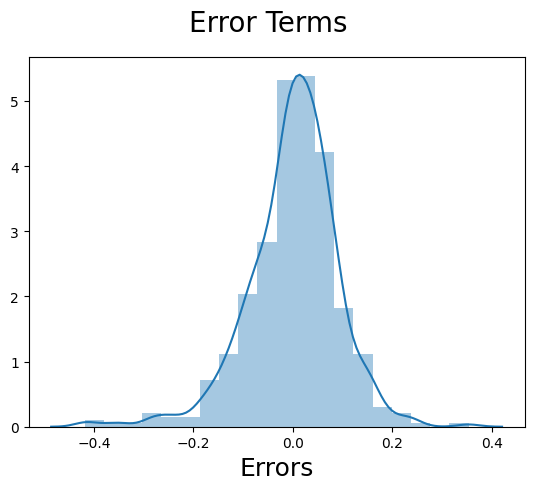

In [37]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

* <font color='green'>**As expected, the error terms follow a normal distribution.**</font>

## 5. Model Evaluation

In [38]:
final_features=list(X_train_rfe.columns)
# final_features
X_test_rfe=df_test[final_features]
X_test_rfe.head()

,spring,summer,winter,july,sep,sun,Light_Snow_Rain,Misty,year,temp,windspeed
184,0,0,0,1,0,0,0,1,0,0.831783,0.084219
535,0,1,0,0,0,0,0,0,1,0.901354,0.153728
299,0,0,1,0,0,0,0,1,0,0.511964,0.334206
221,0,0,0,0,0,0,0,0,0,0.881625,0.339570
152,0,1,0,0,0,0,0,0,0,0.817246,0.537414


In [39]:
X_test_lm = sm.add_constant(X_test_rfe)
y_test_pred=final_lm.predict(X_test_lm)

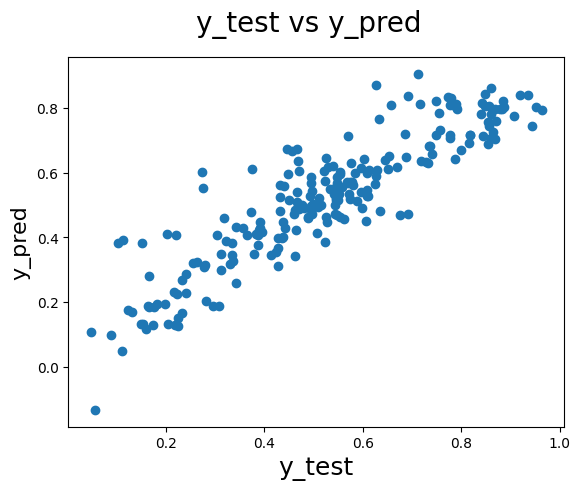

In [40]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   
plt.show()

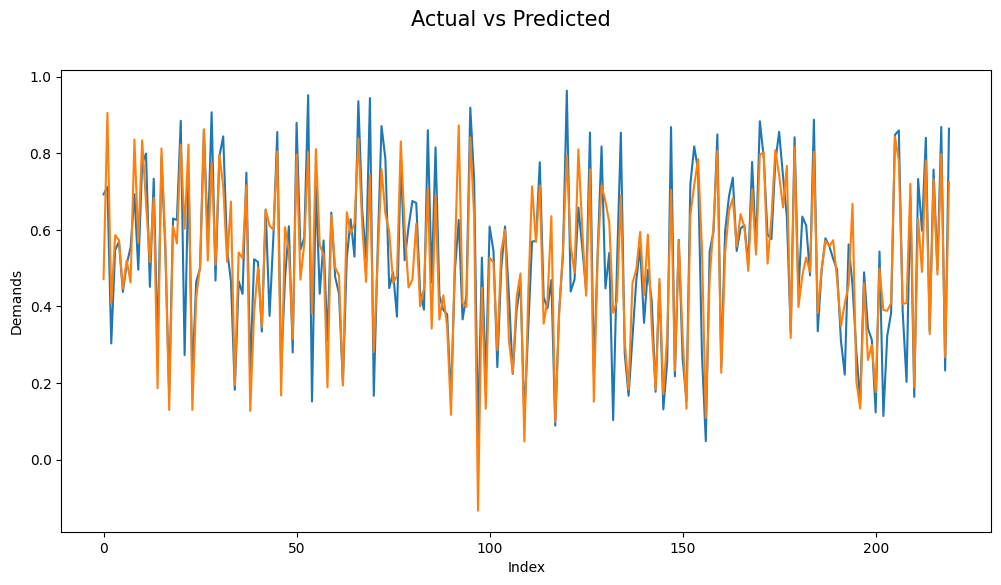

In [41]:
pred_df=pd.DataFrame({"i":[i for i in range(0,len(X_test_rfe),1)],
                      "y_test":y_test,
                      "y_test_pred":y_test_pred})

# plot the predicted values and actual values from the test set
plt.figure(figsize=[12,6])
sns.lineplot(data=pred_df, x="i",y="y_test")
sns.lineplot(data=pred_df, x="i",y="y_test_pred")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [42]:
print(final_lm.params)

const              0.203387
spring            -0.068197
summer             0.047885
winter             0.081830
july              -0.048253
sep                0.072321
sun               -0.044959
Light_Snow_Rain   -0.284654
Misty             -0.080237
year               0.233876
temp               0.491742
windspeed         -0.149694
dtype: float64



**Equation of our best fitted line is:**  

### <font color='blue'>**$ cnt = 0.203 -0.068  \times  spring + 0.047  \times  summer + 0.081 \times winter -0.048 \times july + 0.072 \times sep -0.044 \times sun -0.284 \times Light Snow Rain -0.080 \times Misty + 0.233 \times year - 0.491 \times temp -0.149 \times windspeed $**</font>

In [43]:
train_r2_score=r2_score(y_train,y_train_pred)
test_r2_score=r2_score(y_test,y_test_pred)
train_adj_r2 = round(1-(1-test_r2_score)*(X_test_rfe.shape[0]-1)/(X_test_rfe.shape[0]-X_test_rfe.shape[1]-1),4)
test_adj_r2 = round(1-(1-train_r2_score)*(X_train_rfe.shape[0]-1)/(X_train_rfe.shape[0]-X_train_rfe.shape[1]-1),4)
print(f"Train R-Sqaured      : {round(train_r2_score,3)}")
print(f"Test R-Sqaured       : {round(test_r2_score,3)}")
print(f"Train Adj.R-Sqaured  : {round(train_adj_r2,3)}")
print(f"Test Adj.R-Sqaured   : {round(test_adj_r2,3)}")

Train R-Sqaured      : 0.836
Test R-Sqaured       : 0.806
Train Adj.R-Sqaured  : 0.796
Test Adj.R-Sqaured   : 0.832


In [44]:
print("-"*50)
print("Significant variables for predicting the demand: ")
print("-"*50)
for i,col in enumerate(X_train_rfe.columns):
    print(i+1," ",col)

--------------------------------------------------
Significant variables for predicting the demand: 
--------------------------------------------------
1   spring
2   summer
3   winter
4   july
5   sep
6   sun
7   Light_Snow_Rain
8   Misty
9   year
10   temp
11   windspeed


**Significant variables for predicting the demand:**   
1. season (spring,summer,winter)
2. months (sep, july)
3. weekday (sun)
4. weathersit (Light Snow Rain, Misty)
5. year 
6. temp 
7. windspeed